In [ ]:
# Notebook adapted from Jeremy P. Howard

## Linear Function

In [1]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

In [25]:
beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
noise_p = 4*np.random.binomial(1, 0.03, size=n)
print("\nnoise_p: " + str(noise_p))
noise_n = -4*np.random.binomial(1, 0.03, size=n)
print("\nnoise_n: " + str(noise_n))
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n) + noise_p + noise_n
print("\nx: " + str(x))
print("\ny: " + str(y))
index_without_noise = []
for i in range(n):
    if noise_p[i] == 0 and noise_n[i] == 0:
        index_without_noise.append(i)
print("\nindex_without_noise: " + str(index_without_noise))
l_x_wo_n = []
l_y_wo_n = []
for e in index_without_noise:
    l_x_wo_n.append(x[e])
    l_y_wo_n.append(y[e])
x_wo_noise = np.array(l_x_wo_n)
y_wo_noise = np.array(l_y_wo_n)
print("\nx_wo_noise: " + str(x_wo_noise))
print("\ny_wo_noise: " + str(y_wo_noise)) 

beta = -1.
alpha = 3.
beta_mse = -1.
alpha_mse = 3.
learning_rate = 0.1
delta = 0.9
learning_rate = 0.1
delta = 1.5


noise_p: [0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

noise_n: [ 0  0  0  0  0  0 -4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -4]

x: [0.29399978 0.4129318  0.05961663 0.29954612 0.13843366 0.90874738
 0.34375887 0.49904251 0.39948477 0.79519863 0.72101645 0.97850997
 0.75716427 0.08716617 0.61638641 0.17962276 0.17602176 0.66321435
 0.03889551 0.91619702 0.25032025 0.25791853 0.14376305 0.65457381
 0.1340307  0.76898842 0.31247384 0.58766446 0.45509084 0.71167376]

y: [ 4.69036016  5.71659992  3.48120526  4.80784106  4.04941554  8.32905152
  1.12241502  5.83369857  5.51268395  7.69947881  7.49774962 13.30593258
 11.81152026  3.43757165  6.6649355   4.19377295  4.0108329   6.79651494
  3.06838783  8.76671338  4.51662212  4.46578936  3.81735368  6.82837929
  3.38152965  7.61339938  4.92528444  6.41906696  5.86820171  3.59871167]

index_without_noise: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2

In [26]:
# Function to update parameters (alpha and beta) for the standard regression
def update_alpha_and_beta_mse_std_reg_wo_noise():
    global alpha_mse, beta_mse
    y_predicted = linear_function(alpha_mse,beta_mse,x_wo_noise)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y_wo_noise)
    derivative_of_loss_wrt_beta = x_wo_noise* derivative_of_loss_wrt_alpha
    alpha_mse = alpha_mse - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta_mse = beta_mse - learning_rate*derivative_of_loss_wrt_beta.mean()
    return alpha_mse, beta_mse

def derivatives_linear_part_huber(y_predicted):
    """
    loss = delta * (|y - (alpha + beta * x)|) - 0.5 * delta**2
    if |y - (alpha + beta * x)| > 0:
        loss = delta * (y - (alpha + beta * x)) - 0.5 * delta**2
        derivative loss wrt alpha = delta * (0 -(1 + 0)) - 0 = -delta
        derivative loss wrt beta = delta * (0 - (0 + x)) - 0 = -delta * x
    if |y - (alpha + beta * x)| < 0:
        loss = delta * (-1) * (y - (alpha + beta * x)) - 0.5 * delta**2
        derivative loss wrt alpha = delta * (-1) * (0 -(1 + 0)) - 0 = delta
        derivative loss wrt beta = delta * (-1) * (0 - (0 + x)) - 0 = delta * x
    Combining these 2 cases ( >0 and <0):
    """
    derivative_of_loss_wrt_alpha = - delta * np.sign(y - y_predicted)
    derivative_of_loss_wrt_beta = - delta * np.sign(y - y_predicted)
    return derivative_of_loss_wrt_alpha, derivative_of_loss_wrt_beta

def derivatives_quadratic_part_huber(y_predicted):
    # loss = 0.5 * (y - (alpha + beta * x))**2
    # derivative loss wrt alpha = -1 * (2 / 2) * (y - (alpha + beta * x))
    derivative_of_loss_wrt_alpha = -1*(y - y_predicted)
    # derivative loss wrt beta = -x * (2 / 2) * (y - (alpha + beta * x))
    derivative_of_loss_wrt_beta = -1*x*(y- y_predicted)
    return derivative_of_loss_wrt_alpha, derivative_of_loss_wrt_beta
    
# Function to update parameters (alpha and beta) for the model which uses Huber Loss
def update_alpha_and_beta_huber():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha, derivative_of_loss_wrt_beta = np.where(np.abs(y - y_predicted) <= delta, derivatives_quadratic_part_huber(y_predicted), derivatives_linear_part_huber(y_predicted))
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    return alpha, beta

def huber_loss(y_pred, y, delta):
    error = y_pred - y
    is_smaller = np.abs(error) <= delta
    mse = np.square(error)
    mae = np.abs(error)
    return np.where(is_smaller, 0.5*mse, delta*(mae - 0.5*delta))


def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    y_std_reg = linear_function(alpha_mse, beta_mse,x)
    line_std_reg.set_data(x, y_std_reg)
    for i in range(20): 
        a, b = update_alpha_and_beta_huber()
        c, d = update_alpha_and_beta_mse_std_reg_wo_noise()
    # Compute y_predicted_final for the case of standard regression using the points without extra noise
    y_predicted_final_mse = linear_function(c, d, x_wo_noise)
    # Compute y_predicted_final for the case of Huber Loss
    y_predicted_final_huber = linear_function(a, b, x)
    # Compute y_predicted_final for the case of checking the MSE of the points without extra noise using Huber Loss
    y_predicted_final_huber_wo_noise = linear_function(a, b, x_wo_noise)
    huber = huber_loss(y_predicted_final_huber, y, delta)
    print("Huber Loss Linear Function with SGD: " + str(huber))
    mse_huber_wo_noise = (np.square(y_predicted_final_huber_wo_noise - y_wo_noise)).mean()
    print("MSE Linear Function with SGD Huber Loss of data without noise: " + str(mse_huber_wo_noise))
    mse_wo_noise = (np.square(y_predicted_final_mse - y_wo_noise)).mean()
    print("MSE Linear Function with SGD for Standard Regression of data without noise: " + str(mse_wo_noise))
    return (line, line_std_reg)

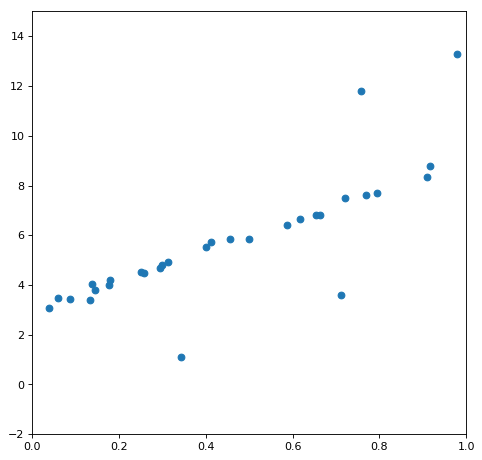

In [27]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)
line_std_reg, = ax.plot([], [], lw=4)

In [28]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [29]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

Huber Loss Linear Function with SGD: [1.19085571 1.21285832 1.23486092 1.25686353 1.27886613 1.30086874
 1.32287134 1.34487395 1.36687655 1.38887916 1.41088177 1.43288437
 1.45488698 1.47688958 1.49889219 1.52089479 1.5428974  1.5649
 1.58690261 1.60890521 1.63090782 1.65291043 1.67491303 1.69691564
 1.71891824 1.74092085 1.76292345 1.78492606 1.80692866 1.82893127
 1.85093387 1.87293648 1.89493909 1.91694169 1.9389443  1.9609469
 1.98294951 2.00495211 2.02695472 2.04895732 2.07095993 2.09296254
 2.11496514 2.13696775 2.15897035 2.18097296 2.20297556 2.22497817
 2.24698077 2.26898338 2.29098598 2.31298859 2.3349912  2.3569938
 2.37899641 2.40099901 2.42300162 2.44500422 2.46700683 2.48900943
 2.51101204 2.53301464 2.55501725 2.57701986 2.59902246 2.62102507
 2.64302767 2.66503028 2.68703288 2.70903549 2.73103809 2.7530407
 2.7750433  2.79704591 2.81904852 2.84105112 2.86305373 2.88505633
 2.90705894 2.92906154 2.95106415 2.97306675 2.99506936 3.01707196
 3.03907457 3.06107718 3.0830797

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('resulting_animation.mp4', writer=writer)

In [ ]:
print('Done.')